In [2]:
# description
# https://www.kaggle.com/c/boston-housing

# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.boston_housing.load_data(path='boston_housing.npz')

57344/57026 [==============================] - 0s 7us/step


input_shape가 13개라는 것은 입력값이 13개라는 것

dense(10은 히든 레이어가 10개

첫부분의 dense에서는 인풋 개수를 정의해줘야한다.

dense10(히든레이어) 과 dense1(결과값)을 의미한다.

레이어가 아니라, 노드에서 노드로 가는 거미줄이 dense라고 생각

13->10->1 히든과 아웃풋에서 activation설정가능하다

히든에서는 relu가 가장 기본. 

마지막은 원하는 task 에 따라서 sigmoid를 넣거나 softmax를 쓴다

regression이면 아무것도 설정하지 않아도 된다. (=linear라고 붙이는 것)

<compile할 때 두 가지 경우를 생각할 수 있다.>
regression(무조건 optimizer = rmsprop이고, loss는 mse를 쓴다!)과 classification(optimizer = adam, loss = entrophy?)

**parameter숫자는 화살표 수와 똑같다.** Q. 어떻게 140개, 11개가 나오는가? 시험문제에 무조건 나와요!

첫번째 140에 해당되는 화살표는 13->10으로 가는 화살표, 두번째는 10->1 로 가는 화살표

인풋에 y =ax+b 에서 b에 해당하는 y절편을 넣어야하기 때문에 1을 넣는다! 그래서 14 * 10

두번째 레이어(10->1)의 node는 10이지만, 히든레이어에 1을 하나 더 준다. dense니까 다 연결해서 11개가 되는 것.

코드를 짰을 때, 그림이 어떻게 그려지고, 아래 표와 같이 숫자가 어떻게 정해지는지 알아야한다. 

In [4]:
model = Sequential()
model.add(Dense(10, input_shape=[13], activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


모델을 다 짜고, input output의 처리는? 
**none**
13은 입력값의 개수. 이 때 y절편 1은 카운트하지 않는다. 입력 차원은 13차원.

출력의 디멘션은 1, 13개의 숫자가 들어가서 1이 나온다? 

none은 1이 들어가있다고 이해하면 됨. 왜 1이라고 안하고 none일까?

1 x 13의 행렬이 들어가서, 13 x 10 의 행렬. 10 x 1 의 행렬
1x13 13x10 10x1 
계산되면, 1x10 10x1 = 1x1
1x13 대신에 100x13으로 할 수도 있다. 그래도 곱해지는데 결과 값은 100 x 1 이 나온다. 

boston housing 에서 한 집만 고려할 때 1x13, 100가구를 고려하면, 100x13

computation을 할 때 100개를 한꺼번에 neural net에 넣을 수도 있는 것!

행렬의 계산과정에서 아무런 문제가 없다. 

1이 들어갈 수도 있지만, 100 이 들어갈 수도 있다. 
none 은 input과 output의 개수가 같아야함. 데이터의 수에 따라 달라질 수 있기 때문에 none으로 비워둔다. 

In [5]:
print(model.input_shape)
print(model.output_shape)

(None, 13)
(None, 1)


none = unknown 인데, 늘 정해놓지 않을 순 없다. 

100개가 한꺼번에 처리 될 수 있다. 

**한꺼번에 처리하는 데이터의 수 = none = batch_size**

training을 한꺼번에 시킬 수 있다. 
training = (data가 가장 fit하도록 a,b값을 구하는 것)

### None = batch_size?

moderl.fit은 실제 데이터를 가지고 weight matrix를 구하는 것

트레이닝할 때, batch size를 정할 수 있다. 

keras model.fit batch_size

404개의 데이터 샘플이 존재한다

설정안하면 디폴트 값은 32

In [7]:
x_train.shape

(404, 13)

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=1)

In [6]:
model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 839us/sample - loss: 31.2181


31.218123192880668

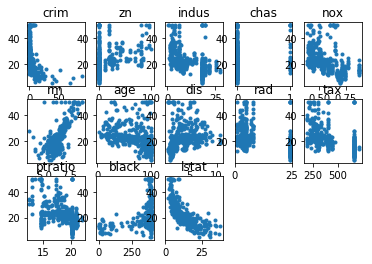

In [47]:
# INPUT::
# 1. crim: per capita crime rate by town.
# 2. zn: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3. indus: proportion of non-retail business acres per town.
# 4. chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# 5. nox: nitrogen oxides concentration (parts per 10 million).
# 6. rm: average number of rooms per dwelling.
# 7. age: proportion of owner-occupied units built prior to 1940.
# 8. dis: weighted mean of distances to five Boston employment centres.
# 9. rad: index of accessibility to radial highways.
# 10. tax: full-value property-tax rate per $10,000.
# 11. ptratio: pupil-teacher ratio by town.
# 12. black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# 13. lstat: lower status of the population (percent).

# TARGET::
# medv: median value of owner-occupied homes in $1000s.

boston_housing = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age',
                  'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']

for i in range(13):
    plt.subplot(3,5,i+1)
    plt.plot(x_train[:,i], y_train, '.')
    plt.title(boston_housing[i])
plt.show()

### make the highest price!

패턴을 보고, 가상으로 입력 데이터를 만들어보기
어떤 패턴이 집값을 높게 만드는지 데이터를 넣어보기
model.predict 완성된 모델을 실제로 사용해서 입력을 넣으면, 출력값이 나옴.

[ ]값들은 숫자가 13개 들어있는 리스트로 구현-> np.array로 무조건! 바꿔줘야함

**왜 reshape할까?**
list를 np.array로 하면 13개짜리 숫자 값인데, 반드시 1,13으로 reshape해야하는 이유는 뭘까?

input shape이 none, 13 이기 때문에 (? x 13) 이어야 한다.

input shape의 형태가 정해졌기 때문에 거기에 맞춰서 reshape을 꼭 해야한다. 

데이터를 2,3개 넣고싶으면???

In [9]:
model.predict(np.array([0, 90, 0, 1, 0, 
                        100, 0, 10, 0, 250, 
                        13, 300, 0]).reshape(1,13))

array([[155.31218]], dtype=float32)

### make the lowest price!

In [51]:
model.predict(np.array([100, 10, 25, 0, 1, 
                        50, 100, 0, 25, 700, 
                        23, 0, 30]).reshape(1,13))

array([[41.14243]], dtype=float32)